<a href="https://colab.research.google.com/github/Misheal-22/Traffic-Sign-Recognition-Model/blob/main/Traffic_Sign_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization


In [2]:
!pip install opendatasets

In [3]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: misheal22
Your Kaggle Key: ¬∑¬∑¬∑¬∑¬∑¬∑¬∑¬∑¬∑¬∑
Dataset URL: https://www.kaggle.com/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 612M/612M [00:01<00:00, 405MB/s]


In [4]:
DATASET_PATH = "/content/gtsrb-german-traffic-sign/train"   # adjust path

IMG_SIZE = 48   # resize all images to 48x48
images, labels = [], []

for label in os.listdir(DATASET_PATH):
    folder = os.path.join(DATASET_PATH, label)
    if not os.path.isdir(folder):
        continue
    for file in os.listdir(folder):
        img_path = os.path.join(folder, file)
        img = cv2.imread(img_path)
        if img is None:
            continue
        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
        images.append(img)
        labels.append(int(label))

X = np.array(images) / 255.0   # normalize to [0,1]
y = np.array(labels)

# one-hot encode labels
num_classes = len(np.unique(y))
y = to_categorical(y, num_classes)

# split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print("Train shape:", X_train.shape, "Test shape:", X_test.shape)


Train shape: (31367, 48, 48, 3) Test shape: (7842, 48, 48, 3)


DATA AUGMENTATION

In [5]:
datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1
)
datagen.fit(X_train)


CUSTOM CNN MODEL

In [6]:
cnn_model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    BatchNormalization(),
    MaxPooling2D((2,2)),

    Conv2D(64, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2,2)),

    Conv2D(128, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = cnn_model.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    validation_data=(X_test, y_test),
    epochs=20
)



/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


981/981 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 42s 36ms/step - accuracy: 0.3529 - loss: 2.4932 - val_accuracy: 0.9328 - val_loss: 0.2334
Epoch 2/20
981/981 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 29s 30ms/step - accuracy: 0.8319 - loss: 0.5216 - val_accuracy: 0.9810 - val_loss: 0.0616
Epoch 3/20
981/981 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 28s 29ms/step - accuracy: 0.9154 - loss: 0.2700 - val_accuracy: 0.9767 - val_loss: 0.0737
Epoch 4/20
981/981 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 28s 29ms/step - accuracy: 0.9376 - loss: 0.2004 - val_accuracy: 0.9851 - val_loss: 0.0462
Epoch 5/20
981/981 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 29s 30ms/step - accuracy: 0.9492 - loss: 0.1632 - val_accuracy: 0.9936 - val_loss: 0.0235
Epoch 6/20
981/981 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 28s 29ms/step - accuracy: 0.9589 - loss: 0.1338 - val_accuracy: 0.9921 - val_loss

MOBILE NETV2 TRANSFER LEARNING

In [9]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D

base_model = MobileNetV2(weights="imagenet", include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))
base_model.trainable = False   # freeze base model

mobilenet_model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

mobilenet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# üîπ UPDATED HERE ‚Üí save history for MobileNet
mobilenet_history = mobilenet_model.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    validation_data=(X_test, y_test),
    epochs=10
)

/tmp/ipython-input-587462405.py:4: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights="imagenet", include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))


9406464/9406464 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 0us/step
Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


981/981 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 72s 58ms/step - accuracy: 0.3061 - loss: 2.5247 - val_accuracy: 0.5657 - val_loss: 1.3400
Epoch 2/10
981/981 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 31s 32ms/step - accuracy: 0.4820 - loss: 1.6114 - val_accuracy: 0.6116 - val_loss: 1.1631
Epoch 3/10
981/981 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 43s 35ms/step - accuracy: 0.5245 - loss: 1.4457 - val_accuracy: 0.6435 - val_loss: 1.0733
Epoch 4/10
981/981 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 31s 32ms/step - accuracy: 0.5449 - loss: 1.3696 - val_accuracy: 0.6687 - val_loss: 1.0067
Epoch 5/10
981/981 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 36s 36ms/step - accuracy: 0.5648 - loss: 1.3129 - val_accuracy: 0.6891 - val_loss: 0.9284
Epoch 6/10
981/981 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 32s 33ms/step - accuracy: 0.5804 - loss: 1.2699 - val_accuracy: 0.6938 - val_loss

PLOT TRAINING CURVES

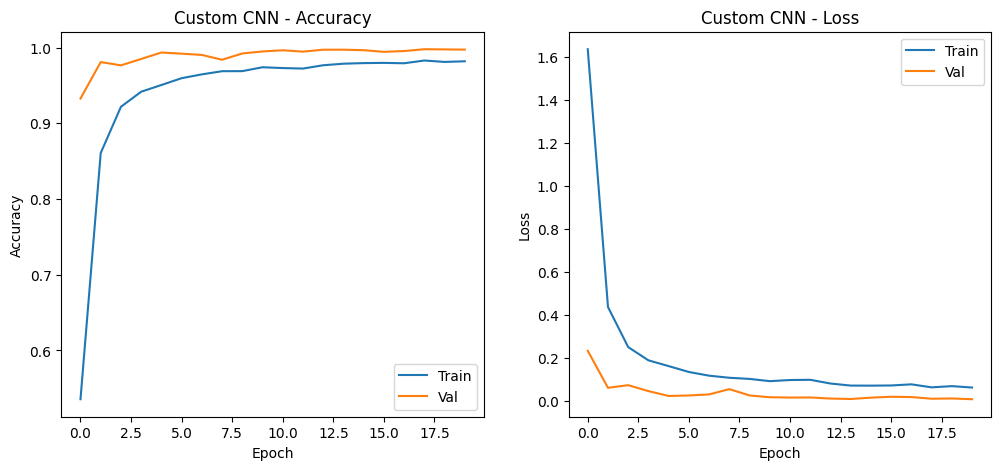

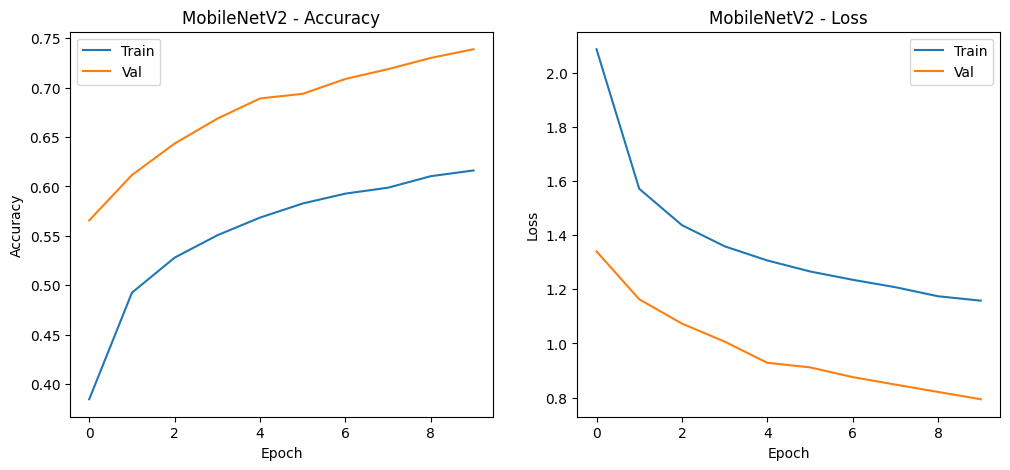

In [10]:
def plot_history(history, title="Model"):
    plt.figure(figsize=(12,5))

    # Accuracy
    plt.subplot(1,2,1)
    plt.plot(history.history['accuracy'], label='Train')
    plt.plot(history.history['val_accuracy'], label='Val')
    plt.title(f"{title} - Accuracy")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()

    # Loss
    plt.subplot(1,2,2)
    plt.plot(history.history['loss'], label='Train')
    plt.plot(history.history['val_loss'], label='Val')
    plt.title(f"{title} - Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()

    plt.show()

# üîπ UPDATED HERE ‚Üí compare CNN vs MobileNet
plot_history(history, "Custom CNN")
plot_history(mobilenet_history, "MobileNetV2")

EVALUATION (CUSTOM CNN)

246/246 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 4ms/step

=== Custom CNN Results ===
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        42
           1       1.00      0.99      1.00       444
           2       0.99      1.00      0.99       450
           3       1.00      0.98      0.99       282
           4       1.00      1.00      1.00       396
           5       0.98      0.99      0.99       372
           6       1.00      1.00      1.00        84
           7       1.00      0.99      1.00       288
           8       0.99      1.00      0.99       282
           9       1.00      1.00      1.00       294
          10       1.00      1.00      1.00       402
          11       1.00      1.00      1.00       264
          12       1.00      1.00      1.00       420
          13       1.00      1.00      1.00       432
          14       1.00      1.00      1.00       156
          15       0.99   

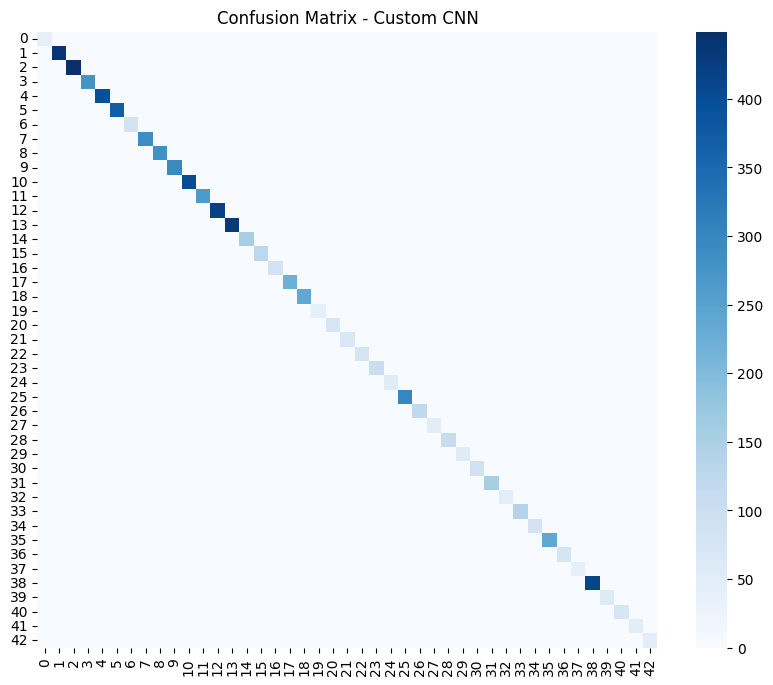

In [11]:
y_pred_cnn = np.argmax(cnn_model.predict(X_test), axis=1)
y_true = np.argmax(y_test, axis=1)

print("\n=== Custom CNN Results ===")
print(classification_report(y_true, y_pred_cnn))

cm_cnn = confusion_matrix(y_true, y_pred_cnn)
plt.figure(figsize=(10,8))
sns.heatmap(cm_cnn, annot=False, cmap="Blues")
plt.title("Confusion Matrix - Custom CNN")
plt.show()

EVALUATION (MOBILENET)

246/246 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 10s 18ms/step

=== MobileNetV2 Results ===
              precision    recall  f1-score   support

           0       0.93      0.33      0.49        42
           1       0.63      0.76      0.69       444
           2       0.63      0.61      0.62       450
           3       0.67      0.49      0.57       282
           4       0.67      0.63      0.65       396
           5       0.63      0.71      0.66       372
           6       0.89      0.79      0.84        84
           7       0.76      0.72      0.74       288
           8       0.66      0.59      0.62       282
           9       0.80      0.78      0.79       294
          10       0.79      0.88      0.83       402
          11       0.54      0.72      0.62       264
          12       0.97      0.96      0.97       420
          13       0.95      0.98      0.96       432
          14       0.91      0.95      0.93       156
          15       0.89

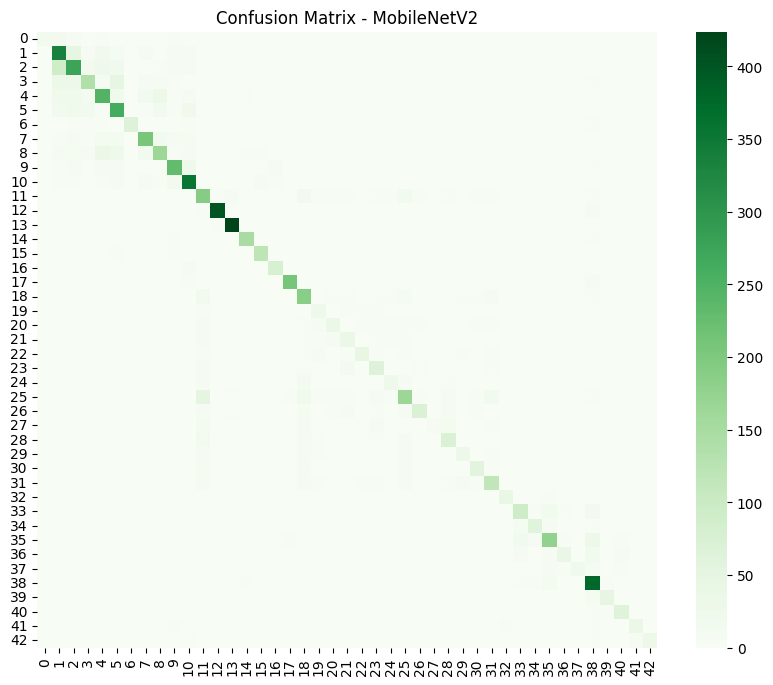

In [12]:
y_pred_mobilenet = np.argmax(mobilenet_model.predict(X_test), axis=1)

print("\n=== MobileNetV2 Results ===")
print(classification_report(y_true, y_pred_mobilenet))

cm_mobilenet = confusion_matrix(y_true, y_pred_mobilenet)
plt.figure(figsize=(10,8))
sns.heatmap(cm_mobilenet, annot=False, cmap="Greens")
plt.title("Confusion Matrix - MobileNetV2")
plt.show()


COMPARE FINAL ACCURACY

In [13]:
cnn_acc = history.history['val_accuracy'][-1]
mobilenet_acc = mobilenet_history.history['val_accuracy'][-1]

print(f"‚úÖ Final Validation Accuracy - Custom CNN: {cnn_acc:.4f}")
print(f"‚úÖ Final Validation Accuracy - MobileNetV2: {mobilenet_acc:.4f}")

‚úÖ Final Validation Accuracy - Custom CNN: 0.9974
‚úÖ Final Validation Accuracy - MobileNetV2: 0.7390
